<a href="https://colab.research.google.com/github/Danata117/ML/blob/main/ML_Praktika2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install pandas seaborn scikit-learn
!pip install pandas matplotlib seaborn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
PATH_TO_FILE: str = '/content/drive/MyDrive/student_depression_dataset.csv'
df = pd.read_csv(PATH_TO_FILE)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  category
 6   Work Pressure                          27901 non-null  category
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  category
 9   Job Satisfaction                       27901 non-null  category
 10  Sleep Duration                         27901 non-null  cat

In [11]:
# преобразовать категориальные признаки в category
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
df['Financial Stress'] = df['Financial Stress'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df['Academic Pressure'] = df['Academic Pressure'].astype('category')
df['Work Pressure'] = df['Work Pressure'].astype('category')
df['Study Satisfaction'] = df['Study Satisfaction'].astype('category')
df['Job Satisfaction'] = df['Job Satisfaction'].astype('category')
df['Depression'] = df['Depression'].astype('category')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  category
 6   Work Pressure                          27901 non-null  category
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  category
 9   Job Satisfaction                       27901 non-null  category
 10  Sleep Duration                         27901 non-null  cat

In [14]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df["CGPA"]
X = df.drop(["id", "CGPA"], axis=1)

In [19]:
X.head(n=3)

,Gender,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

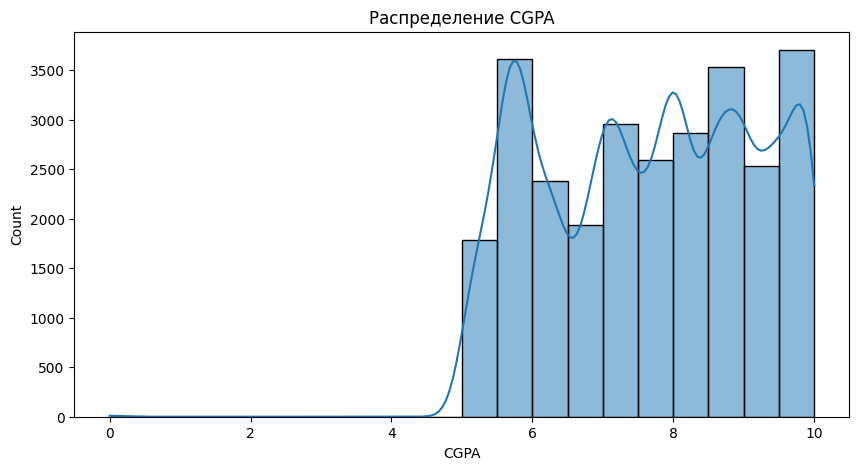

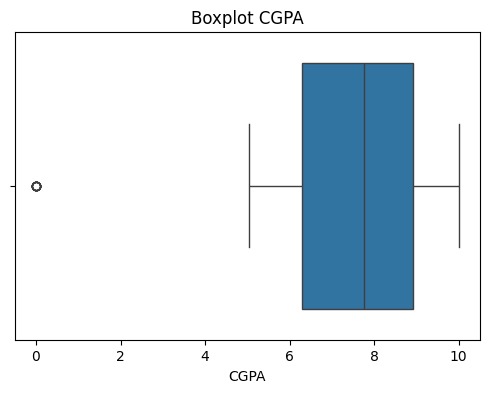

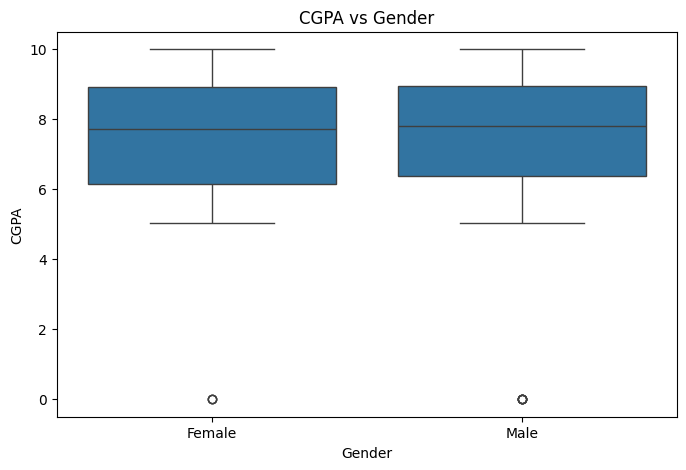

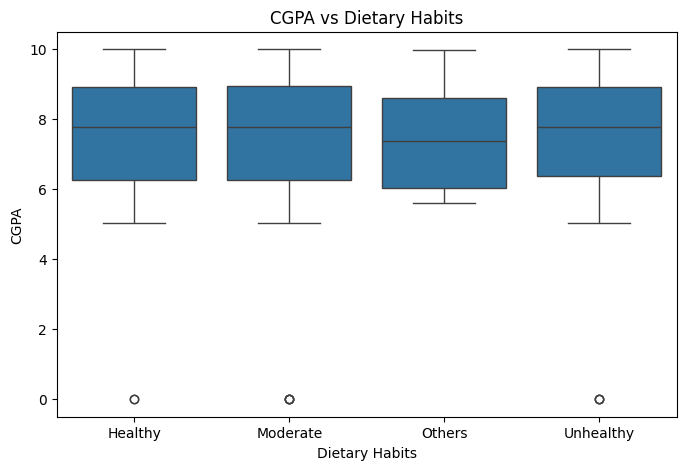

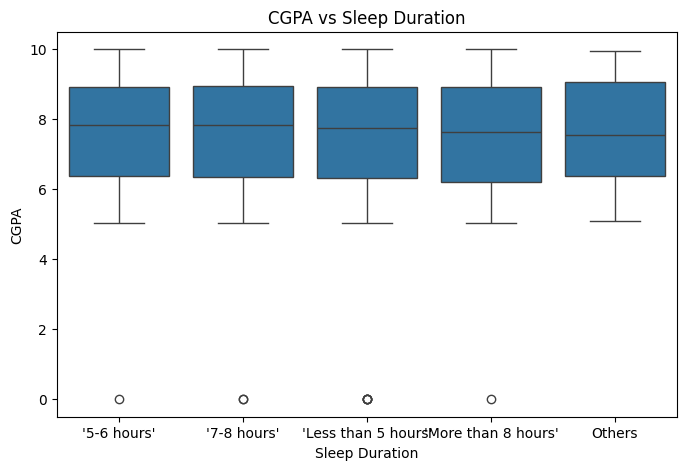

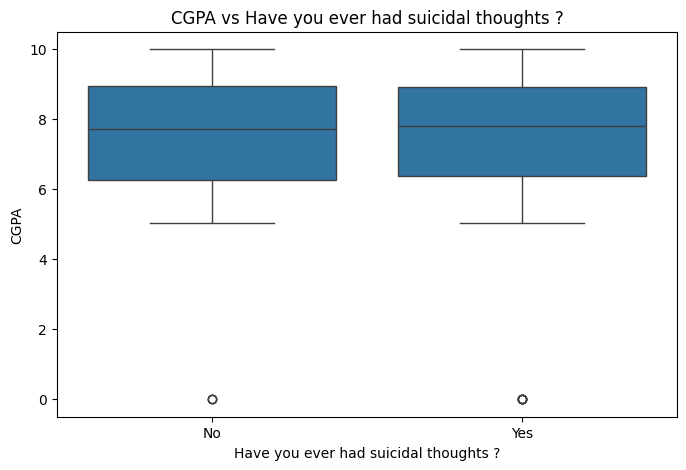

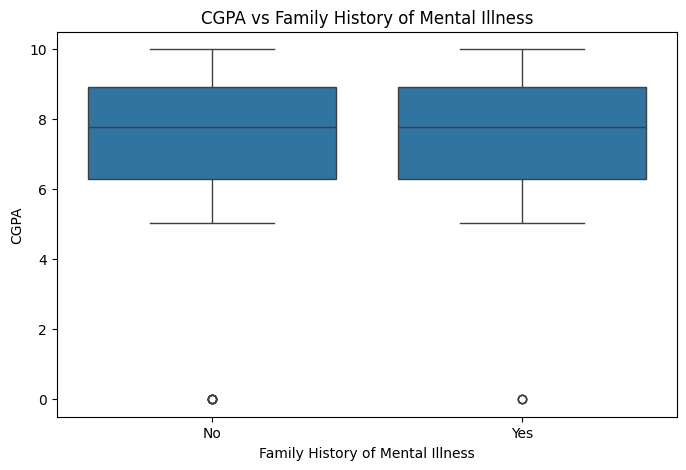

ValueError: could not convert string to float: '?'

In [18]:
# 2. Посмотрим на распределение CGPA
plt.figure(figsize=(10,5))
sns.histplot(y, kde=True, bins=20)
plt.title("Распределение CGPA")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=y)
plt.title("Boxplot CGPA")
plt.show()

# 3. Проверим зависимость CGPA от категориальных признаков
categorical_cols = ["Gender", "Dietary Habits", "Sleep Duration",
                    "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=y)
    plt.title(f"CGPA vs {col}")
    plt.show()

# 4. Проверим зависимость CGPA от числовых признаков
numeric_cols = ["Age", "Academic Pressure", "Work Pressure",
                "Study Satisfaction", "Job Satisfaction", "Work/Study Hours", "Financial Stress"]

corr = df[numeric_cols + ["CGPA"]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция числовых признаков с CGPA")
plt.show()

# 5. Работа с пропусками
df_clean = df.copy()

# Числовые признаки → медиана
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Категориальные признаки → мода
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# 6. Формируем X и y
y = df_clean["CGPA"]
X = df_clean.drop(["id", "CGPA", "City", "Profession", "Degree"], axis=1)

# 7. Записываем отобранные признаки
best_features = X.columns.tolist()

print("Отобранные признаки для анализа:", best_features)

In [ ]:
categorial_features = [] # перечислить названия колонок с категориальными фичами
numeric_features = [] # перечислить названия колонок с категориальными фичами
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест